In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import time
import sklearn
from random import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from tabulate import tabulate
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

evaluate={'Acc':"Accuracy", 'b_Acc':"Balanced Accuracy", 'F1':"F1 Score", 'kap':"Kappa", 'ROC':"Roc"}

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
def GA(train,test,cols,gen_number=25,outputcsv="GA_output.csv"):
    #defining various steps required for the genetic algorithm
    # GA adapted from https://datascienceplus.com/genetic-algorithm-in-machine-learning-using-python/
    def initilization_of_population(size,n_feat):
        population = []
        for i in range(size):
            chromosome = np.ones(n_feat,dtype=np.bool)
            chromosome[:int(0.3*n_feat)]=False
            np.random.shuffle(chromosome)
            population.append(chromosome)
        return population

    def fitness_score(population):
        scores = []
        for chromosome in population:
            logmodel.fit(X_train.iloc[:,chromosome],y_train)
            predictions = logmodel.predict(X_test.iloc[:,chromosome])
            scores.append(sklearn.metrics.f1_score(y_test,predictions,average= "macro"))
        scores, population = np.array(scores), np.array(population) 
        inds = np.argsort(scores)
        return list(scores[inds][::-1]), list(population[inds,:][::-1])

    def selection(pop_after_fit,n_parents):
        population_nextgen = []
        for i in range(n_parents):
            population_nextgen.append(pop_after_fit[i])
        return population_nextgen

    def crossover(pop_after_sel):
        population_nextgen=pop_after_sel
        for i in range(len(pop_after_sel)):
            child=pop_after_sel[i]
            child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
            population_nextgen.append(child)
        return population_nextgen

    def mutation(pop_after_cross,mutation_rate):
        population_nextgen = []
        for i in range(0,len(pop_after_cross)):
            chromosome = pop_after_cross[i]
            for j in range(len(chromosome)):
                if random.random() < mutation_rate:
                    chromosome[j]= not chromosome[j]
            population_nextgen.append(chromosome)
        #print(population_nextgen)
        return population_nextgen

    def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                       X_test, y_train, y_test):

        best_chromo= []
        best_score= []
        population_nextgen=initilization_of_population(size,n_feat)
        for i in range(n_gen):
            second=time.time()
            scores, pop_after_fit = fitness_score(population_nextgen)
            #print(scores[:2])
            zaman=time.time()-second

            ths.write(f"{np.mean(scores)},{np.mean(scores)},{zaman}\n")
            


            pop_after_sel = selection(pop_after_fit,n_parents)
            pop_after_cross = crossover(pop_after_sel)
            population_nextgen = mutation(pop_after_cross,mutation_rate)
            best_chromo.append(pop_after_fit[0])
            best_score.append(scores[0])
        return best_chromo,best_score
    
    



    df = pd.read_csv(train,usecols=cols)#,header=None )
    df=df.fillna(0)
    #df = df.sample(n = 10000)
    X_train =df[df.columns[0:-1]]
    #X_train=np.array(X_train)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_train=df[df.columns[-1]].cat.codes  
    df = pd.read_csv(test,usecols=cols)#,header=None )
    df=df.fillna(0)
    #df = df.sample(n = 10000)
    X_test =df[df.columns[0:-1]]
    #X_test=np.array(X_test)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_test=df[df.columns[-1]].cat.codes  

    
    ths = open(f"./{outputcsv}", "w")
    ths.write("MEAN,STD,TIME\n")
    logmodel=DecisionTreeClassifier()
    #print ('%-30s %-30s %-30s' % ("MEAN","STD","TIME"))
    chromo,score=generations(size=200,n_feat=X_train.shape[1],n_parents=120,mutation_rate=0.005,
                         n_gen=gen_number,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
    #logmodel.fit(X_train.iloc[:,chromo[-1]],y_train)
    #predictions = logmodel.predict(X_test.iloc[:,chromo[-1]])
    #print("F1 Score score after genetic algorithm is= "+str(sklearn.metrics.f1_score(y_test,predictions,average= "macro")))
    ths.close()
    sonuç=[]
    for k,j in enumerate(chromo):
        temp=X_train.iloc[:,j]
        temp=list(temp.columns)
        temp.append("Label")
        sonuç.append(temp)
    
    np.save(outputcsv.replace("csv","npy"), sonuç)
    gf = pd.read_csv(outputcsv)
    gf=gf["MEAN"].values
    gf=np.argmax(gf) 
    return sonuç[gf],gf

In [5]:
def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [6]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
    return files_add

In [7]:
ml_list={         

         
"SVM":{"SYN":SVC(gamma=1,C=1),
"HTTP":SVC(gamma=1,C=10),                  
"ACK":SVC(gamma=1,C=10),
"UDP":SVC(gamma=0.1,C=10),   
"ARP":SVC(gamma=0.1,C=1),       
"SP":SVC(gamma=1 ,C=1),      
"BF":SVC(gamma=0.01,C=10),  
"OS":SVC(gamma=0.1 ,C=10),
"SCHD":SVC(gamma=1,C=10),     
"MHDis":SVC(gamma=0.1,C=10)}}
         

In [8]:
def target_name(name):
    df = pd.read_csv(name,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    return target_names

In [9]:
folder("results")
folder("pdfs")
folder("results/fin")
folder("models")


## Calculation of evaluations

In [10]:
def score(train_time,test_time,predict,y_test,class_based_results,repeat,cv,dname,ml,sw):
    train_time=train_time[0]
    test_time=test_time[0]
    rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
    pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
    f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")     
    accuracy=sklearn.metrics.accuracy_score(y_test, predict)
    accuracy_b=sklearn.metrics.balanced_accuracy_score( y_test,predict)
    kappa=sklearn.metrics.cohen_kappa_score(y_test, predict,labels=None, weights=None, sample_weight=None)
    try:
        roc=sklearn.metrics.roc_auc_score(y_test, predict)
    except:roc=0
    report = sklearn.metrics.classification_report(y_test, predict, target_names=target_names,output_dict=True)
    cr = pd.DataFrame(report).transpose()
    line=[dname,sw,repeat,cv,ml,accuracy,accuracy_b,pr,rc,f_1,kappa,roc,train_time,test_time]

    if class_based_results.empty:
        class_based_results =cr
    else:
        class_based_results = class_based_results.add(cr, fill_value=0)
    return class_based_results,line

In [11]:
def ML_CV(loop1,loop2,output_csv1,cols,dname,sw):
    fold=5
    repetition=2
    for ii in ml_list:
        output_csv=output_csv1.replace("ML",ii)
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Dataset","SW","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        max_f1=0
        for i in range(repetition):

            rnd = random()
            
            kfold = sklearn.model_selection.KFold(n_splits=fold, shuffle=True, random_state=int(rnd*100))  
            cv=0
            df = pd.read_csv(loop1,usecols=cols)#,header=None )
            ##df = df.reset_index(drop=True)
            df=df.fillna(0)

            #del df["MAC"] # if dataset has MAC colomn please uncomment this line
            X =df[df.columns[0:-1]]
            X=np.array(X)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y=df[df.columns[-1]].cat.codes  
            X.shape
            for train_index, test_index in kfold.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]  



                #dname=loop1  [6:-13]  
                results_y=[]
                cv+=1
                results_y.append(y_test)


                precision=[]
                recall=[]
                f1=[]
                accuracy=[]
                train_time=[]
                test_time=[]
                total_time=[]
                kappa=[]
                accuracy_b=[]

                    #machine learning algorithm is applied in this section
                clf = ml_list[ii][dname]#choose algorithm from ml_list dictionary
                second=time.time()
                clf.fit(X_train, y_train)
                train_time.append(float((time.time()-second)) )
                second=time.time()
                predict =clf.predict(X_test)
                test_time.append(float((time.time()-second)) )

                altime=0
                class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
                lines.append(line)
                df_cm = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, predict))
                if cm.empty:
                    cm =df_cm
                else:
                    cm = cm.add(df_cm, fill_value=0)

                if line[9]>max_f1:
                    max_f1=line[9]
                    pickle.dump(clf, open(f'./models/{ii}_{dname}_{sw}_model.pkl', 'wb'))

        
        class_based_results=class_based_results/(repetition*fold)
        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        results=results.round(3)
        print (tabulate(results, headers=list(results.columns)))
        print()
        
        print (tabulate(class_based_results, headers=list(class_based_results.columns)))
        class_based_results.to_csv(output_csv.replace(".csv","class_based_results.csv"))
        if True:
            cm=cm//(repetition*fold)
            graph_name=output_csv[:-4]+"_confusion matrix.pdf"   
            plt.figure(figsize = (5,3.5))
            sns.heatmap(cm,xticklabels=target_names, yticklabels=target_names, annot=True, fmt='g')
            plt.savefig(graph_name,bbox_inches='tight')#, dpi=400)
            plt.show()
            #print(cm)
            print("\n\n\n")             


In [12]:
def ML(loop1,loop2,output_csv1,cols,dname,sw):
    fold=1
    repetition=10
    for ii in ml_list:
        output_csv=output_csv1.replace("ML",ii)
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Dataset","SW","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        max_f1=0
        for i in range(repetition):

            #rnd = random()
            
            #kfold = sklearn.model_selection.KFold(n_splits=fold, shuffle=True, random_state=int(rnd*100))  
            cv=0
            df = pd.read_csv(loop1,usecols=cols)#,header=None )
            df=df.fillna(0)
            X_train =df[df.columns[0:-1]]
            X_train=np.array(X_train)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y_train=df[df.columns[-1]].cat.codes  


            df = pd.read_csv(loop2,usecols=cols)#,header=None )
            df=df.fillna(0)
            X_test =df[df.columns[0:-1]]
            X_test=np.array(X_test)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y_test=df[df.columns[-1]].cat.codes  




            #dname=loop1  [6:-13]  
            results_y=[]
            cv+=1
            results_y.append(y_test)


            precision=[]
            recall=[]
            f1=[]
            accuracy=[]
            train_time=[]
            test_time=[]
            total_time=[]
            kappa=[]
            accuracy_b=[]

                #machine learning algorithm is applied in this section
            clf = ml_list[ii][dname]#choose algorithm from ml_list dictionary
            second=time.time()
            clf.fit(X_train, y_train)
            train_time.append(float((time.time()-second)) )
            second=time.time()
            predict =clf.predict(X_test)
            test_time.append(float((time.time()-second)) )

            altime=0
            class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
            lines.append(line)
            df_cm = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, predict))
            if cm.empty:
                cm =df_cm
            else:
                cm = cm.add(df_cm, fill_value=0)

            if line[9]>max_f1:
                max_f1=line[9]
                pickle.dump(clf, open(f'./models/{ii}_{dname}_{sw}_model.pkl', 'wb'))
                
        
        class_based_results=class_based_results/(repetition*fold)
        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        results=results.round(3)
        print (tabulate(results, headers=list(results.columns)))
        print()
        
        print (tabulate(class_based_results, headers=list(class_based_results.columns)))
        class_based_results.to_csv(output_csv.replace(".csv","class_based_results.csv"))
        if True:
            cm=cm//(repetition*fold)
            graph_name=output_csv[:-4]+"_confusion matrix.pdf"   
            plt.figure(figsize = (5,3.5))
            sns.heatmap(cm,xticklabels=target_names, yticklabels=target_names, annot=True, fmt='g')
            plt.savefig(graph_name,bbox_inches='tight')#, dpi=400)
            plt.show()
            #print(cm)
            print("\n\n\n")             


# GA output

In [13]:
import json
with open('GA_output_ET.json', 'r') as fp:
    feature_list = json.load(fp)

# CV

In [14]:
file_list={'./INPUT/SM/DoS-SYN-1.csv':"SYN",
'./INPUT/SM/MB-HTTP-4.csv':"HTTP",
'./INPUT/SM/MB-ACK-4.csv':"ACK",
'./INPUT/SM/MB-UDP-4.csv':"UDP",
'./INPUT/SM/MitM-ARP-6.csv':"ARP",
'./INPUT/SM/Scan-Port-3.csv':"SP",
'./INPUT/SM/MB-BF-5.csv':"BF",
'./INPUT/SM/Scan-OS-3.csv':"OS",  
'./INPUT/SM/Scan-HDis-3.csv':"SCHD",
'./INPUT/SM/MB-HDis-3.csv':"MHDis"}

./INPUT/SM/DoS-SYN-1.csv
['ts', 'IP_flags', 'IP_DF', 'TCP_SYN', 'TCP_ACK', 'sport_class', 'dst_IP_diversity', 'IP_add_count', 'pck_size_std_WE', 'pck_size_sum_of_EW', 'ts_mean_WE', 'TCP_window_std_WE', 'pck_size_mean_2', 'TCP_window_mean_2', 'TCP_SYN_sum', 'TCP_ACK_sum', 'TCP_SYN_ratio', 'TCP_ACK_ratio', 'TCP_SYN_SR', 'TCP_ACK_SR', 'pck_size_mean_6', 'ts_mean_6', 'TCP_window_mean_6', 'ts_mean_9', 'ts_std_9', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SYN           0    1     0  SVM   0.948    0.944   0.956  0.944  0.947  0.894  0.944   24.011     3.896
 1  SYN           0    2     0  SVM   0.941    0.936   0.951  0.936  0.94   0.881  0.936   26.058     3.672
 2  SYN           0    3     0  SVM   0.943    0.938   0.952  0.938  0.942  0.884  0.938   25.339     3.675
 3  SYN           

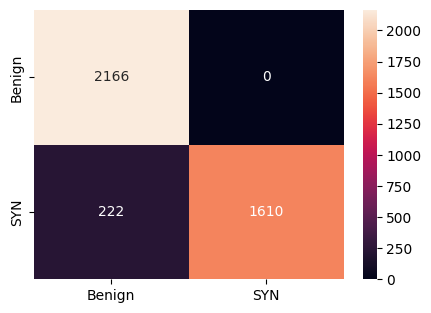





./INPUT/SM/MB-HTTP-4.csv
['TCP_flags', 'dport_class', 'pck_size_sum_of_EW', 'ts_std_WE', 'ts_sum_of_EW', 'payload_bytes_sum_of_EW', 'entropy_mean_WE', 'TCP_window_mean_2', 'sport_sum', 'TCP_ACK_ratio', 'sum', 'TCP_PSH_SR', 'ts_std_6', 'entropy_mean_6', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  HTTP          0    1     0  SVM   0.966      0.5   0.483    0.5  0.491      0    0.5   53.142     3.28
 1  HTTP          0    2     0  SVM   0.964      0.5   0.482    0.5  0.491      0    0.5   44.528     3.29
 2  HTTP          0    3     0  SVM   0.952      0.5   0.476    0.5  0.488      0    0.5   45.291     3.252
 3  HTTP          0    4     0  SVM   0.956      0.5   0.478    0.5  0.489      0    0.5   31.019     3.265
 4  HTTP          0    5     0  SVM   0.961      0.5   0.481    0.5

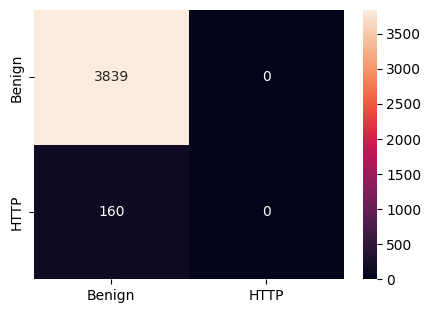





./INPUT/SM/MB-ACK-4.csv
['ts_std_WE', 'TCP_window_sum_of_EW', 'payload_bytes_mean_WE', 'payload_bytes_sum_of_EW', 'sport_sum', 'TCP_ACK_ratio', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  ACK           0    1     0  SVM   0.934      0.5   0.467    0.5  0.483      0    0.5   38.582     2.702
 1  ACK           0    2     0  SVM   0.93       0.5   0.465    0.5  0.482      0    0.5   26.631     2.711
 2  ACK           0    3     0  SVM   0.929      0.5   0.465    0.5  0.482      0    0.5   32.68      2.71
 3  ACK           0    4     0  SVM   0.928      0.5   0.464    0.5  0.481      0    0.5   37.69      2.713
 4  ACK           0    5     0  SVM   0.928      0.5   0.464    0.5  0.481      0    0.5   38.323     2.717
 5  ACK           0    1     1  SVM   0.934      0.5   0.467    0.5  0.483      0    0.5

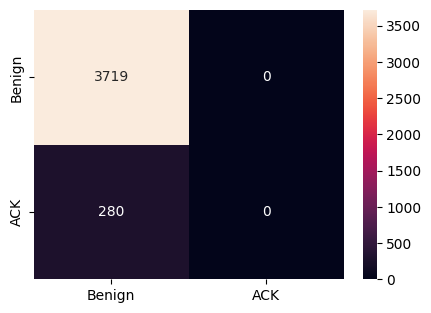





./INPUT/SM/MB-UDP-4.csv
['IP_tos', 'IP_flags', 'IP_DF', 'IP_proto', 'TCP_dataofs', 'TCP_flags', 'TCP_ACK', 'TCP_window', 'TCP_options', 'sport_class', 'Protocol', 'ts_diff', 'ts_std_WE', 'TCP_window_mean_WE', 'TCP_window_std_WE', 'TCP_window_sum_of_EW', 'ts_mean_2', 'TCP_window_mean_2', 'TCP_SYN_sum', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'sum', 'TCP_ACK_SR', 'ts_std_6', 'TCP_window_mean_6', 'entropy_std_6', 'ts_std_9', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec    F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  ----  -----  -----  -------  --------
 0  UDP           0    1     0  SVM       1        1       1      1     1  1          1    8.976     1.166
 1  UDP           0    2     0  SVM       1        1       1      1     1  0.999      1   10.296     1.171
 2  UDP           0    3     0  SVM       1        1       1      1     1  1          1   10.735     1.166
 3  UDP      

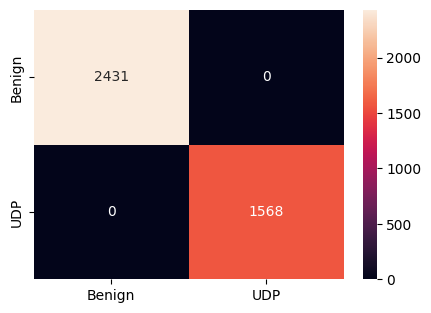





./INPUT/SM/MitM-ARP-6.csv
['ts', 'IP_version', 'IP_ihl', 'IP_tos', 'IP_DF', 'IP_ttl', 'IP_options', 'ICMP_code', 'TCP_reserved', 'TCP_flags', 'TCP_URG', 'TCP_ECE', 'TCP_CWR', 'TCP_urgptr', 'TCP_options', 'UDP_len', 'DNS_rd', 'DNS_qdcount', 'DNS_ancount', 'DNS_nscount', 'dport_class', 'entropy', 'dst_IP_diversity', 'pck_size_diff', 'pck_size_std_WE', 'ts_diff', 'payload_bytes_diff', 'payload_bytes_sum_of_EW', 'entropy_diff', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'ts_mean_2', 'ts_std_2', 'payload_bytes_mean_2', 'payload_bytes_std_2', 'entropy_std_2', 'sport_sum', 'TCP_FIN_sum', 'TCP_SYN_sum', 'TCP_RST_sum', 'TCP_ACK_sum', 'TCP_SYN_ratio', 'TCP_RST_ratio', 'TCP_PSH_ratio', 'TCP_ACK_ratio', 'TCP_CWR_ratio', 'TCP_SYN_SR', 'TCP_PSH_SR', 'TCP_ECE_SR', 'TCP_CWR_SR', 'pck_size_std_6', 'ts_mean_6', 'ts_std_6', 'TCP_window_std_6', 'payload_bytes_mean_6', 'entropy_std_6', 'pck_size_std_9', 'ts_std_9', 'TCP_window_std_9', 'payload_bytes_mean_9', 'entropy_mean_9', 'entropy_st

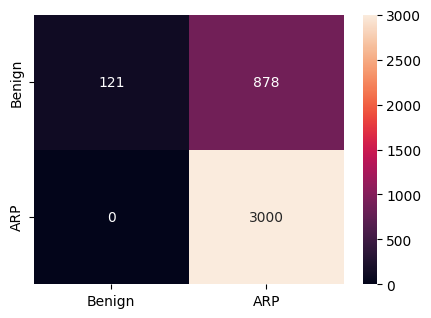





./INPUT/SM/Scan-Port-3.csv
['IP_flags', 'IP_DF', 'TCP_flags', 'TCP_SYN', 'TCP_ACK', 'dst_IP_diversity', 'entropy_std_WE', 'entropy_sum_of_EW', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'TCP_ACK_SR', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SP            0    1     0  SVM   1        1       1      1      1      1      1        3.434     0.848
 1  SP            0    2     0  SVM   1        0.998   1      0.998  0.999  0.998  0.998    3.162     0.839
 2  SP            0    3     0  SVM   0.998    0.992   0.999  0.992  0.996  0.991  0.992    2.827     0.799
 3  SP            0    4     0  SVM   1        0.998   1      0.998  0.999  0.998  0.998    3.382     0.845
 4  SP            0    5     0  SVM   0.999    0.999   0.996  0.999  0.998  0.996  0.999    3.754     0.838
 5  SP            0    1     1  SVM   1   

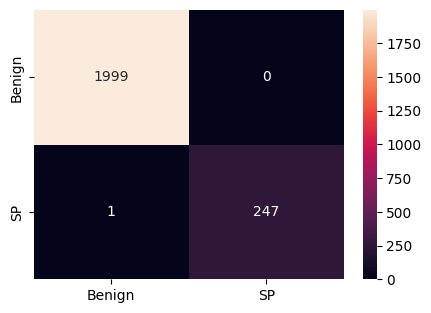





./INPUT/SM/MB-BF-5.csv
['ts', 'TCP_window_sum_of_EW', 'entropy_mean_WE', 'pck_size_std_2', 'TCP_window_mean_2', 'TCP_window_std_2', 'payload_bytes_mean_2', 'sport_sum', 'TCP_FIN_sum', 'TCP_FIN_SR', 'pck_size_mean_6', 'pck_size_std_6', 'ts_std_6', 'TCP_window_mean_6', 'TCP_window_std_6', 'payload_bytes_mean_6', 'payload_bytes_std_6', 'ts_mean_9', 'ts_std_9', 'TCP_window_mean_9', 'TCP_window_std_9', 'payload_bytes_mean_9', 'payload_bytes_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  BF            0    1     0  SVM   0.946      0.5   0.473    0.5  0.486      0    0.5    8.977     0.864
 1  BF            0    2     0  SVM   0.95       0.5   0.475    0.5  0.487      0    0.5    9.287     0.852
 2  BF            0    3     0  SVM   0.95       0.5   0.475    0.5  0.487      0    0.5    8.541     0.861

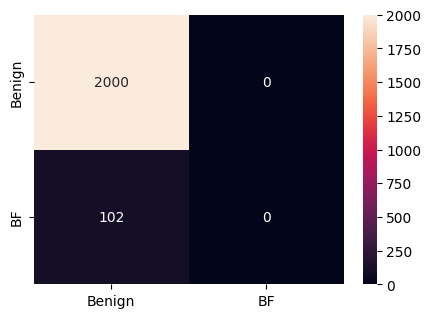





./INPUT/SM/Scan-OS-3.csv
['TCP_flags', 'TCP_SYN', 'TCP_ACK', 'TCP_URG', 'TCP_window', 'TCP_urgptr', 'UDP_len', 'entropy', 'Protocol', 'dst_port_diversity', 'pck_size_mean_WE', 'pck_size_std_WE', 'ts_diff', 'ts_std_WE', 'ts_sum_of_EW', 'TCP_window_std_WE', 'payload_bytes_diff', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'ts_mean_2', 'payload_bytes_std_2', 'dport_sum', 'TCP_SYN_sum', 'TCP_PSH_sum', 'TCP_ACK_sum', 'TCP_URG_sum', 'TCP_FIN_ratio', 'TCP_PSH_ratio', 'TCP_ACK_ratio', 'sum', 'TCP_FIN_SR', 'TCP_SYN_SR', 'TCP_PSH_SR', 'TCP_ACK_SR', 'TCP_URG_SR', 'TCP_ECE_SR', 'TCP_CWR_SR', 'pck_size_mean_6', 'pck_size_std_6', 'ts_mean_6', 'ts_std_6', 'payload_bytes_mean_6', 'entropy_mean_6', 'pck_size_mean_9', 'ts_mean_9', 'payload_bytes_mean_9', 'entropy_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  ------

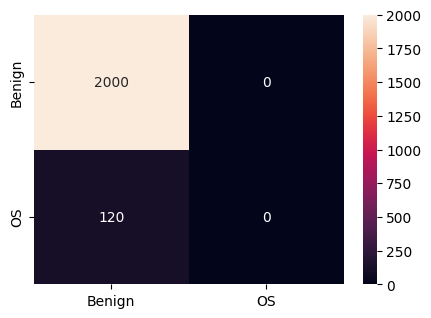





./INPUT/SM/Scan-HDis-3.csv
['ts', 'Ether_type', 'IP_version', 'IP_ihl', 'TCP_dataofs', 'TCP_flags', 'TCP_ACK', 'TCP_options', 'sport_class', 'dport_class', 'pck_size_sum_of_EW', 'ts_mean_WE', 'ts_sum_of_EW', 'TCP_window_mean_WE', 'TCP_window_sum_of_EW', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'payload_bytes_sum_of_EW', 'entropy_std_WE', 'TCP_PSH_sum', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'sum', 'pck_size_mean_6', 'ts_mean_6', 'ts_std_6', 'pck_size_mean_9', 'ts_mean_9', 'ts_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SCHD          0    1     0  SVM   0.963    0.567   0.981  0.567  0.608  0.227  0.567    9.89      1.005
 1  SCHD          0    2     0  SVM   0.958    0.551   0.979  0.551  0.582  0.178  0.551   11.075     1.006
 2  SCHD          0    3     0  SVM   0.956    0.544   0.978  0.5

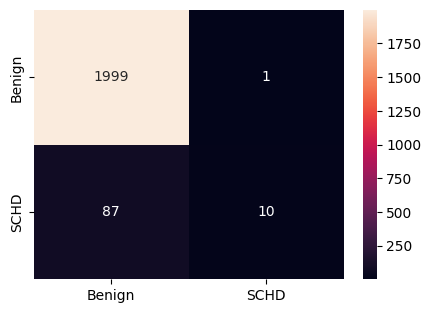





./INPUT/SM/MB-HDis-3.csv
['ts', 'IP_version', 'IP_flags', 'IP_proto', 'TCP_dataofs', 'TCP_options', 'sport_class', 'dport_class', 'Protocol', 'pck_size_mean_WE', 'pck_size_std_WE', 'ts_mean_WE', 'ts_sum_of_EW', 'TCP_window_sum_of_EW', 'ts_mean_2', 'ts_std_2', 'pck_size_mean_6', 'ts_mean_6', 'pck_size_mean_9', 'ts_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  MHDis         0    1     0  SVM   0.982    0.513   0.991  0.513  0.521  0.05   0.513    5.066     0.793
 1  MHDis         0    2     0  SVM   0.985    0.545   0.993  0.545  0.58   0.164  0.545    6.357     0.789
 2  MHDis         0    3     0  SVM   0.98     0.523   0.99   0.523  0.539  0.087  0.523    6.286     0.783
 3  MHDis         0    4     0  SVM   0.978    0.522   0.989  0.522  0.536  0.082  0.522    6.682     0.785
 4  MHDis      

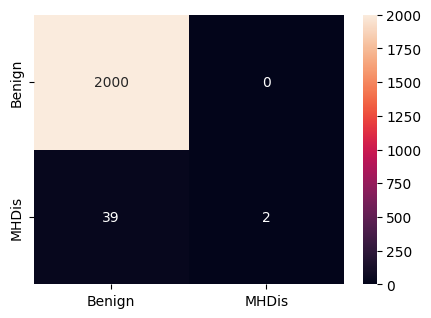

In [15]:
folder("results/cv/")

for file in file_list:
    print(file)
    feature=feature_list[file_list[file]]
    train=file
    test=file
    #feature,_=GA(train,test,features,gen_number=25,outputcsv=f"{file}_DT_chosed_GA_output.csv")
    print(feature)
    output_csv=f"./results/cv/{file_list[file]}_VAL_chosed_output_ML_.csv"
    target_names=["Benign",file_list[file]]
    ML_CV(train,test,output_csv,feature,file_list[file],0)   


# SS

In [16]:
file_list={"SYN":['./INPUT/SM/DoS-SYN-1.csv','./INPUT/SM/DoS-SYN-2.csv'],
"HTTP":['./INPUT/SM/MB-HTTP-4.csv','./INPUT/SM/MB-HTTP-1.csv'],
"ACK":['./INPUT/SM/MB-ACK-4.csv','./INPUT/SM/MB-ACK-1.csv'],
"UDP":['./INPUT/SM/MB-UDP-4.csv','./INPUT/SM/MB-UDP-1.csv'],
"ARP":['./INPUT/SM/MitM-ARP-6.csv','./INPUT/SM/MitM-ARP-4.csv'],  
"SP":['./INPUT/SM/Scan-Port-3.csv','./INPUT/SM/Scan-Port-4.csv'],
"BF":['./INPUT/SM/MB-BF-5.csv','./INPUT/SM/MB-BF-3.csv'],
"OS":['./INPUT/SM/Scan-OS-3.csv','./INPUT/SM/Scan-OS-6.csv'],
"SCHD":['./INPUT/SM/Scan-HDis-3.csv','./INPUT/SM/MB-HDis-2.csv'],
"MHDis":['./INPUT/SM/MB-HDis-3.csv','./INPUT/SM/Scan-HDis-4.csv' ]}
 

SYN
['ts', 'IP_flags', 'IP_DF', 'TCP_SYN', 'TCP_ACK', 'sport_class', 'dst_IP_diversity', 'IP_add_count', 'pck_size_std_WE', 'pck_size_sum_of_EW', 'ts_mean_WE', 'TCP_window_std_WE', 'pck_size_mean_2', 'TCP_window_mean_2', 'TCP_SYN_sum', 'TCP_ACK_sum', 'TCP_SYN_ratio', 'TCP_ACK_ratio', 'TCP_SYN_SR', 'TCP_ACK_SR', 'pck_size_mean_6', 'ts_mean_6', 'TCP_window_mean_6', 'ts_mean_9', 'ts_std_9', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SYN           0    1     0  SVM    0.83    0.801   0.885  0.801  0.811  0.634  0.801   41.615    12.74
 1  SYN           0    1     1  SVM    0.83    0.801   0.885  0.801  0.811  0.634  0.801   41.688    12.736
 2  SYN           0    1     2  SVM    0.83    0.801   0.885  0.801  0.811  0.634  0.801   41.516    12.742
 3  SYN           0    1     3  SVM    0

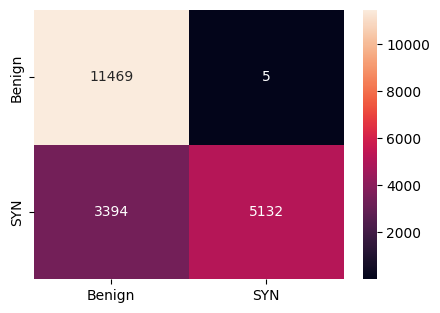





HTTP
['TCP_flags', 'dport_class', 'pck_size_sum_of_EW', 'ts_std_WE', 'ts_sum_of_EW', 'payload_bytes_sum_of_EW', 'entropy_mean_WE', 'TCP_window_mean_2', 'sport_sum', 'TCP_ACK_ratio', 'sum', 'TCP_PSH_SR', 'ts_std_6', 'entropy_mean_6', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  HTTP          0    1     0  SVM   0.944      0.5   0.472    0.5  0.486      0    0.5   74.676    14.1
 1  HTTP          0    1     1  SVM   0.944      0.5   0.472    0.5  0.486      0    0.5   74.688    14.164
 2  HTTP          0    1     2  SVM   0.944      0.5   0.472    0.5  0.486      0    0.5   74.865    14.129
 3  HTTP          0    1     3  SVM   0.944      0.5   0.472    0.5  0.486      0    0.5   74.759    14.065
 4  HTTP          0    1     4  SVM   0.944      0.5   0.472    0.5  0.486      0    0.

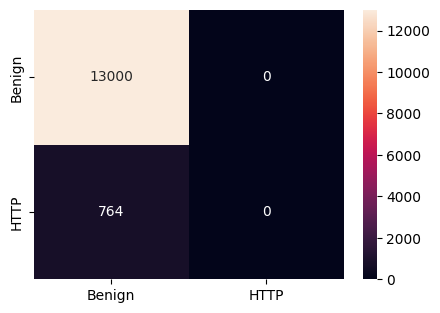





ACK
['ts_std_WE', 'TCP_window_sum_of_EW', 'payload_bytes_mean_WE', 'payload_bytes_sum_of_EW', 'sport_sum', 'TCP_ACK_ratio', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  ACK           0    1     0  SVM   0.305      0.5   0.153    0.5  0.234      0    0.5   43.736    16.994
 1  ACK           0    1     1  SVM   0.305      0.5   0.153    0.5  0.234      0    0.5   43.64     17.005
 2  ACK           0    1     2  SVM   0.305      0.5   0.153    0.5  0.234      0    0.5   43.696    17.003
 3  ACK           0    1     3  SVM   0.305      0.5   0.153    0.5  0.234      0    0.5   43.71     17.01
 4  ACK           0    1     4  SVM   0.305      0.5   0.153    0.5  0.234      0    0.5   43.696    17.022
 5  ACK           0    1     5  SVM   0.305      0.5   0.153    0.5  0.234      0    0.5   43.731    17.009


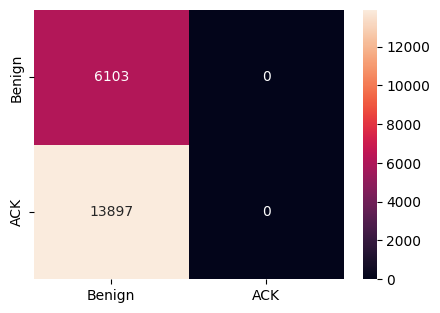





UDP
['IP_tos', 'IP_flags', 'IP_DF', 'IP_proto', 'TCP_dataofs', 'TCP_flags', 'TCP_ACK', 'TCP_window', 'TCP_options', 'sport_class', 'Protocol', 'ts_diff', 'ts_std_WE', 'TCP_window_mean_WE', 'TCP_window_std_WE', 'TCP_window_sum_of_EW', 'ts_mean_2', 'TCP_window_mean_2', 'TCP_SYN_sum', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'sum', 'TCP_ACK_SR', 'ts_std_6', 'TCP_window_mean_6', 'entropy_std_6', 'ts_std_9', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  UDP           0    1     0  SVM   0.791    0.892   0.565  0.892  0.554  0.185  0.892   16.909     7.094
 1  UDP           0    1     1  SVM   0.791    0.892   0.565  0.892  0.554  0.185  0.892   17.012     7.103
 2  UDP           0    1     2  SVM   0.791    0.892   0.565  0.892  0.554  0.185  0.892   17.001     7.142
 3  UDP           0    1    

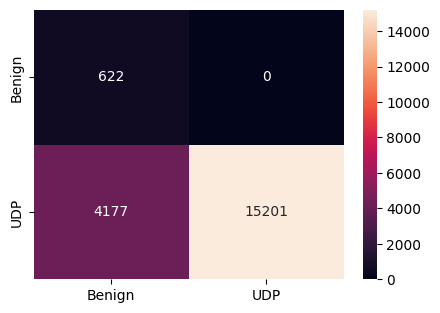





ARP
['ts', 'IP_version', 'IP_ihl', 'IP_tos', 'IP_DF', 'IP_ttl', 'IP_options', 'ICMP_code', 'TCP_reserved', 'TCP_flags', 'TCP_URG', 'TCP_ECE', 'TCP_CWR', 'TCP_urgptr', 'TCP_options', 'UDP_len', 'DNS_rd', 'DNS_qdcount', 'DNS_ancount', 'DNS_nscount', 'dport_class', 'entropy', 'dst_IP_diversity', 'pck_size_diff', 'pck_size_std_WE', 'ts_diff', 'payload_bytes_diff', 'payload_bytes_sum_of_EW', 'entropy_diff', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'ts_mean_2', 'ts_std_2', 'payload_bytes_mean_2', 'payload_bytes_std_2', 'entropy_std_2', 'sport_sum', 'TCP_FIN_sum', 'TCP_SYN_sum', 'TCP_RST_sum', 'TCP_ACK_sum', 'TCP_SYN_ratio', 'TCP_RST_ratio', 'TCP_PSH_ratio', 'TCP_ACK_ratio', 'TCP_CWR_ratio', 'TCP_SYN_SR', 'TCP_PSH_SR', 'TCP_ECE_SR', 'TCP_CWR_SR', 'pck_size_std_6', 'ts_mean_6', 'ts_std_6', 'TCP_window_std_6', 'payload_bytes_mean_6', 'entropy_std_6', 'pck_size_std_9', 'ts_std_9', 'TCP_window_std_9', 'payload_bytes_mean_9', 'entropy_mean_9', 'entropy_std_9', 'Label']
    Dat

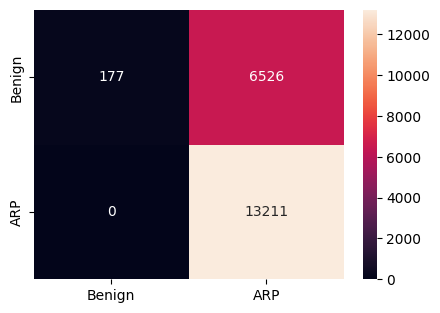





SP
['IP_flags', 'IP_DF', 'TCP_flags', 'TCP_SYN', 'TCP_ACK', 'dst_IP_diversity', 'entropy_std_WE', 'entropy_sum_of_EW', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'TCP_ACK_SR', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SP            0    1     0  SVM    0.86    0.585   0.928  0.585  0.606  0.253  0.585    5.435     3.243
 1  SP            0    1     1  SVM    0.86    0.585   0.928  0.585  0.606  0.253  0.585    5.426     3.259
 2  SP            0    1     2  SVM    0.86    0.585   0.928  0.585  0.606  0.253  0.585    5.421     3.252
 3  SP            0    1     3  SVM    0.86    0.585   0.928  0.585  0.606  0.253  0.585    5.435     3.25
 4  SP            0    1     4  SVM    0.86    0.585   0.928  0.585  0.606  0.253  0.585    5.455     3.27
 5  SP            0    1     5  SVM    0.86    0.585   0.928  0.585 

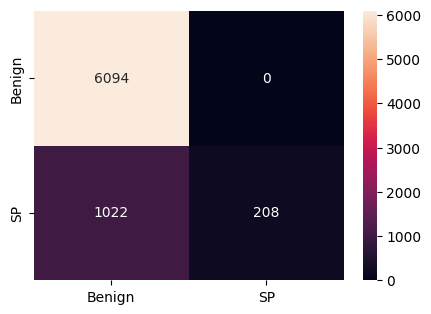





BF
['ts', 'TCP_window_sum_of_EW', 'entropy_mean_WE', 'pck_size_std_2', 'TCP_window_mean_2', 'TCP_window_std_2', 'payload_bytes_mean_2', 'sport_sum', 'TCP_FIN_sum', 'TCP_FIN_SR', 'pck_size_mean_6', 'pck_size_std_6', 'ts_std_6', 'TCP_window_mean_6', 'TCP_window_std_6', 'payload_bytes_mean_6', 'payload_bytes_std_6', 'ts_mean_9', 'ts_std_9', 'TCP_window_mean_9', 'TCP_window_std_9', 'payload_bytes_mean_9', 'payload_bytes_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  BF            0    1     0  SVM   0.952      0.5   0.476    0.5  0.488      0    0.5   19.095     5.335
 1  BF            0    1     1  SVM   0.952      0.5   0.476    0.5  0.488      0    0.5   19.069     5.322
 2  BF            0    1     2  SVM   0.952      0.5   0.476    0.5  0.488      0    0.5   19.051     5.332
 3  BF            0

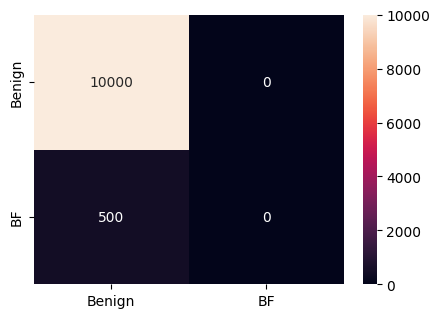





OS
['TCP_flags', 'TCP_SYN', 'TCP_ACK', 'TCP_URG', 'TCP_window', 'TCP_urgptr', 'UDP_len', 'entropy', 'Protocol', 'dst_port_diversity', 'pck_size_mean_WE', 'pck_size_std_WE', 'ts_diff', 'ts_std_WE', 'ts_sum_of_EW', 'TCP_window_std_WE', 'payload_bytes_diff', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'ts_mean_2', 'payload_bytes_std_2', 'dport_sum', 'TCP_SYN_sum', 'TCP_PSH_sum', 'TCP_ACK_sum', 'TCP_URG_sum', 'TCP_FIN_ratio', 'TCP_PSH_ratio', 'TCP_ACK_ratio', 'sum', 'TCP_FIN_SR', 'TCP_SYN_SR', 'TCP_PSH_SR', 'TCP_ACK_SR', 'TCP_URG_SR', 'TCP_ECE_SR', 'TCP_CWR_SR', 'pck_size_mean_6', 'pck_size_std_6', 'ts_mean_6', 'ts_std_6', 'payload_bytes_mean_6', 'entropy_mean_6', 'pck_size_mean_9', 'ts_mean_9', 'payload_bytes_mean_9', 'entropy_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  ----

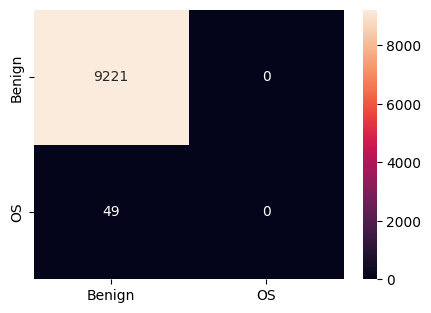





SCHD
['ts', 'Ether_type', 'IP_version', 'IP_ihl', 'TCP_dataofs', 'TCP_flags', 'TCP_ACK', 'TCP_options', 'sport_class', 'dport_class', 'pck_size_sum_of_EW', 'ts_mean_WE', 'ts_sum_of_EW', 'TCP_window_mean_WE', 'TCP_window_sum_of_EW', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'payload_bytes_sum_of_EW', 'entropy_std_WE', 'TCP_PSH_sum', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'sum', 'pck_size_mean_6', 'ts_mean_6', 'ts_std_6', 'pck_size_mean_9', 'ts_mean_9', 'ts_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SCHD          0    1     0  SVM    0.99     0.53   0.924   0.53  0.553   0.11   0.53   22.946     6.062
 1  SCHD          0    1     1  SVM    0.99     0.53   0.924   0.53  0.553   0.11   0.53   22.926     6.077
 2  SCHD          0    1     2  SVM    0.99     0.53   0.924   0.53  0.553   0.11   0.5

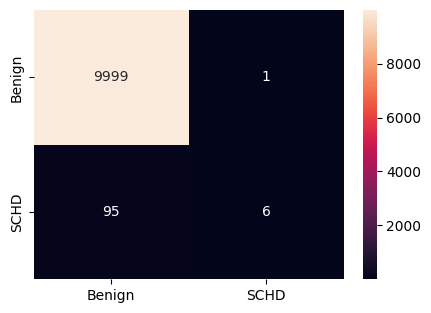





MHDis
['ts', 'IP_version', 'IP_flags', 'IP_proto', 'TCP_dataofs', 'TCP_options', 'sport_class', 'dport_class', 'Protocol', 'pck_size_mean_WE', 'pck_size_std_WE', 'ts_mean_WE', 'ts_sum_of_EW', 'TCP_window_sum_of_EW', 'ts_mean_2', 'ts_std_2', 'pck_size_mean_6', 'ts_mean_6', 'pck_size_mean_9', 'ts_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  MHDis         0    1     0  SVM   0.934    0.556   0.889  0.556  0.583  0.186  0.556   12.39      3.165
 1  MHDis         0    1     1  SVM   0.934    0.556   0.889  0.556  0.583  0.186  0.556   12.407     3.187
 2  MHDis         0    1     2  SVM   0.934    0.556   0.889  0.556  0.583  0.186  0.556   12.476     3.187
 3  MHDis         0    1     3  SVM   0.934    0.556   0.889  0.556  0.583  0.186  0.556   12.547     3.175
 4  MHDis         0    1     4  SV

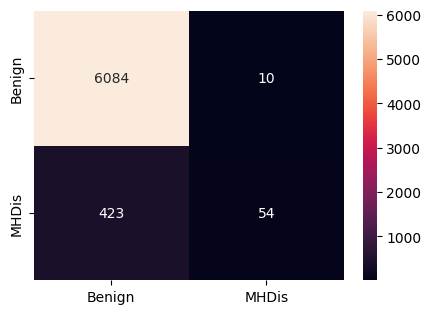

In [17]:
folder("results/val/")

for file in file_list:
    print(file)
    feature=feature_list[file]
    train=file_list[file][0]
    test=file_list[file][1]
    #feature,_=GA(train,test,features,gen_number=25,outputcsv=f"{file}_DT_chosed_GA_output.csv")
    print(feature)
    output_csv=f"./results/val/{file}_VAL_chosed_output_ML_.csv"
    target_names=["Benign",file]
    ML(train,test,output_csv,feature,file,0)   


# TEST

In [18]:
file_list={'SYN': ['./INPUT/SM/DoS-SYN-1.csv',  './INPUT/TEST/small_Edge_IIoT_DDoS_TCP_SYN_Flood_Attacks_00000_20211124180237._SW.csv'],
 'HTTP': ['./INPUT/SM/MB-HTTP-4.csv',  './INPUT/TEST/NetatmoCamHTTPFlood_1_SW.csv'],
'ACK': ['./INPUT/SM/MB-ACK-4.csv',  './INPUT/TEST/NetatmoCamTCPFlood_3_SW.csv'],
 'UDP': ['./INPUT/SM/MB-UDP-4.csv',  './INPUT/TEST/Bot_IoT_UDP_DDoS_00001._SW.csv'],
 'ARP': ['./INPUT/SM/MitM-ARP-6.csv',   './INPUT/TEST/Kitsune_ARP_MitM._SW.csv'],
 'SP': ['./INPUT/SM/Scan-Port-3.csv', './INPUT/TEST/IoT_ENV_[Port_scan]Google_Home_Mini_SW.csv'],
 'BF': ['./INPUT/SM/MB-BF-5.csv',  './INPUT/TEST/AmcrestCamBruteForce_1_SW.csv'],
 'OS': ['./INPUT/SM/Scan-OS-3.csv',  './INPUT/TEST/IoT_ENV_[OS_Service_Detection]Google_Home_Mini_SW.csv'],
"SCHD":['./INPUT/SM/Scan-HDis-3.csv','./INPUT/SM/MB-HDis-3.csv'],
"MHDis":['./INPUT/SM/MB-HDis-3.csv','./INPUT/SM/Scan-HDis-3.csv' ]}

SYN
['ts', 'IP_flags', 'IP_DF', 'TCP_SYN', 'TCP_ACK', 'sport_class', 'dst_IP_diversity', 'IP_add_count', 'pck_size_std_WE', 'pck_size_sum_of_EW', 'ts_mean_WE', 'TCP_window_std_WE', 'pck_size_mean_2', 'TCP_window_mean_2', 'TCP_SYN_sum', 'TCP_ACK_sum', 'TCP_SYN_ratio', 'TCP_ACK_ratio', 'TCP_SYN_SR', 'TCP_ACK_SR', 'pck_size_mean_6', 'ts_mean_6', 'TCP_window_mean_6', 'ts_mean_9', 'ts_std_9', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SYN           1    1     0  SVM     0.5      0.5    0.25    0.5  0.333      0    0.5   41.722    12.705
 1  SYN           1    1     1  SVM     0.5      0.5    0.25    0.5  0.333      0    0.5   41.633    12.733
 2  SYN           1    1     2  SVM     0.5      0.5    0.25    0.5  0.333      0    0.5   41.888    12.707
 3  SYN           1    1     3  SVM    

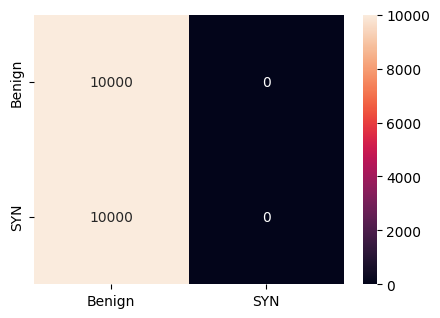





HTTP
['TCP_flags', 'dport_class', 'pck_size_sum_of_EW', 'ts_std_WE', 'ts_sum_of_EW', 'payload_bytes_sum_of_EW', 'entropy_mean_WE', 'TCP_window_mean_2', 'sport_sum', 'TCP_ACK_ratio', 'sum', 'TCP_PSH_SR', 'ts_std_6', 'entropy_mean_6', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  HTTP          1    1     0  SVM     0.5      0.5    0.25    0.5  0.333      0    0.5   74.805    20.418
 1  HTTP          1    1     1  SVM     0.5      0.5    0.25    0.5  0.333      0    0.5   74.497    20.545
 2  HTTP          1    1     2  SVM     0.5      0.5    0.25    0.5  0.333      0    0.5   74.821    20.498
 3  HTTP          1    1     3  SVM     0.5      0.5    0.25    0.5  0.333      0    0.5   75.013    20.474
 4  HTTP          1    1     4  SVM     0.5      0.5    0.25    0.5  0.333      0    

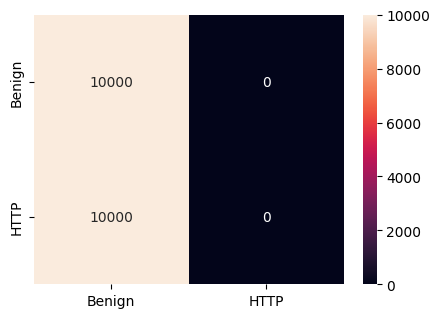





ACK
['ts_std_WE', 'TCP_window_sum_of_EW', 'payload_bytes_mean_WE', 'payload_bytes_sum_of_EW', 'sport_sum', 'TCP_ACK_ratio', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  ACK           1    1     0  SVM     0.5      0.5    0.25    0.5  0.333      0    0.5   43.707    17.083
 1  ACK           1    1     1  SVM     0.5      0.5    0.25    0.5  0.333      0    0.5   43.674    17.009
 2  ACK           1    1     2  SVM     0.5      0.5    0.25    0.5  0.333      0    0.5   43.708    17.037
 3  ACK           1    1     3  SVM     0.5      0.5    0.25    0.5  0.333      0    0.5   43.766    17.026
 4  ACK           1    1     4  SVM     0.5      0.5    0.25    0.5  0.333      0    0.5   43.76     16.928
 5  ACK           1    1     5  SVM     0.5      0.5    0.25    0.5  0.333      0    0.5   43.685    17.034

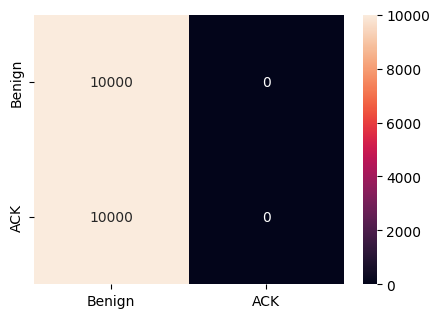





UDP
['IP_tos', 'IP_flags', 'IP_DF', 'IP_proto', 'TCP_dataofs', 'TCP_flags', 'TCP_ACK', 'TCP_window', 'TCP_options', 'sport_class', 'Protocol', 'ts_diff', 'ts_std_WE', 'TCP_window_mean_WE', 'TCP_window_std_WE', 'TCP_window_sum_of_EW', 'ts_mean_2', 'TCP_window_mean_2', 'TCP_SYN_sum', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'sum', 'TCP_ACK_SR', 'ts_std_6', 'TCP_window_mean_6', 'entropy_std_6', 'ts_std_9', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  UDP           1    1     0  SVM   0.758    0.758   0.799  0.758  0.749  0.516  0.758   16.909     7.068
 1  UDP           1    1     1  SVM   0.758    0.758   0.799  0.758  0.749  0.516  0.758   16.933     7.089
 2  UDP           1    1     2  SVM   0.758    0.758   0.799  0.758  0.749  0.516  0.758   16.865     7.075
 3  UDP           1    1    

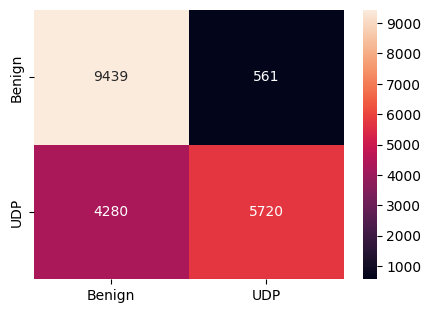





ARP
['ts', 'IP_version', 'IP_ihl', 'IP_tos', 'IP_DF', 'IP_ttl', 'IP_options', 'ICMP_code', 'TCP_reserved', 'TCP_flags', 'TCP_URG', 'TCP_ECE', 'TCP_CWR', 'TCP_urgptr', 'TCP_options', 'UDP_len', 'DNS_rd', 'DNS_qdcount', 'DNS_ancount', 'DNS_nscount', 'dport_class', 'entropy', 'dst_IP_diversity', 'pck_size_diff', 'pck_size_std_WE', 'ts_diff', 'payload_bytes_diff', 'payload_bytes_sum_of_EW', 'entropy_diff', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'ts_mean_2', 'ts_std_2', 'payload_bytes_mean_2', 'payload_bytes_std_2', 'entropy_std_2', 'sport_sum', 'TCP_FIN_sum', 'TCP_SYN_sum', 'TCP_RST_sum', 'TCP_ACK_sum', 'TCP_SYN_ratio', 'TCP_RST_ratio', 'TCP_PSH_ratio', 'TCP_ACK_ratio', 'TCP_CWR_ratio', 'TCP_SYN_SR', 'TCP_PSH_SR', 'TCP_ECE_SR', 'TCP_CWR_SR', 'pck_size_std_6', 'ts_mean_6', 'ts_std_6', 'TCP_window_std_6', 'payload_bytes_mean_6', 'entropy_std_6', 'pck_size_std_9', 'ts_std_9', 'TCP_window_std_9', 'payload_bytes_mean_9', 'entropy_mean_9', 'entropy_std_9', 'Label']
    Dat

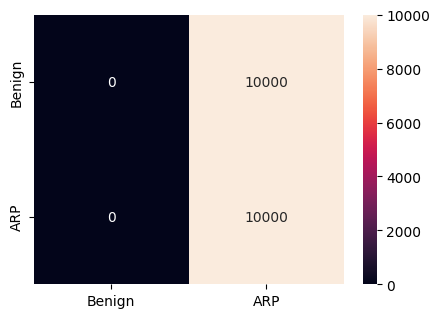





SP
['IP_flags', 'IP_DF', 'TCP_flags', 'TCP_SYN', 'TCP_ACK', 'dst_IP_diversity', 'entropy_std_WE', 'entropy_sum_of_EW', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'TCP_ACK_SR', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SP            1    1     0  SVM   0.543      0.5   0.272    0.5  0.352     -0    0.5    5.426     3.934
 1  SP            1    1     1  SVM   0.543      0.5   0.272    0.5  0.352     -0    0.5    5.412     3.937
 2  SP            1    1     2  SVM   0.543      0.5   0.272    0.5  0.352     -0    0.5    5.421     3.939
 3  SP            1    1     3  SVM   0.543      0.5   0.272    0.5  0.352     -0    0.5    5.42      3.941
 4  SP            1    1     4  SVM   0.543      0.5   0.272    0.5  0.352     -0    0.5    5.408     3.938
 5  SP            1    1     5  SVM   0.543      0.5   0.272    0.

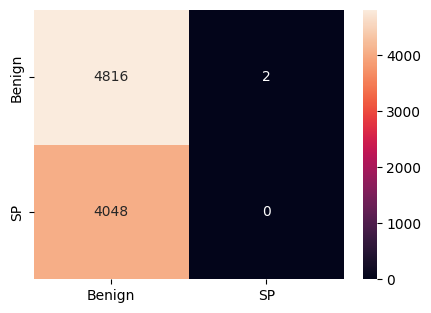





BF
['ts', 'TCP_window_sum_of_EW', 'entropy_mean_WE', 'pck_size_std_2', 'TCP_window_mean_2', 'TCP_window_std_2', 'payload_bytes_mean_2', 'sport_sum', 'TCP_FIN_sum', 'TCP_FIN_SR', 'pck_size_mean_6', 'pck_size_std_6', 'ts_std_6', 'TCP_window_mean_6', 'TCP_window_std_6', 'payload_bytes_mean_6', 'payload_bytes_std_6', 'ts_mean_9', 'ts_std_9', 'TCP_window_mean_9', 'TCP_window_std_9', 'payload_bytes_mean_9', 'payload_bytes_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  BF            1    1     0  SVM   0.455      0.5   0.228    0.5  0.313      0    0.5   19.072     0.29
 1  BF            1    1     1  SVM   0.455      0.5   0.228    0.5  0.313      0    0.5   19.089     0.293
 2  BF            1    1     2  SVM   0.455      0.5   0.228    0.5  0.313      0    0.5   19.073     0.29
 3  BF            1  

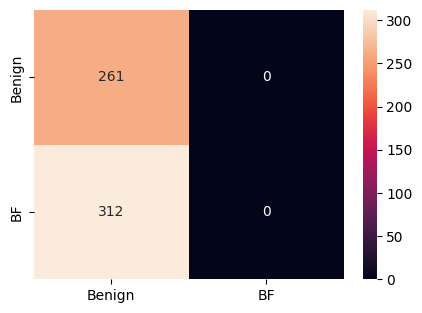





OS
['TCP_flags', 'TCP_SYN', 'TCP_ACK', 'TCP_URG', 'TCP_window', 'TCP_urgptr', 'UDP_len', 'entropy', 'Protocol', 'dst_port_diversity', 'pck_size_mean_WE', 'pck_size_std_WE', 'ts_diff', 'ts_std_WE', 'ts_sum_of_EW', 'TCP_window_std_WE', 'payload_bytes_diff', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'ts_mean_2', 'payload_bytes_std_2', 'dport_sum', 'TCP_SYN_sum', 'TCP_PSH_sum', 'TCP_ACK_sum', 'TCP_URG_sum', 'TCP_FIN_ratio', 'TCP_PSH_ratio', 'TCP_ACK_ratio', 'sum', 'TCP_FIN_SR', 'TCP_SYN_SR', 'TCP_PSH_SR', 'TCP_ACK_SR', 'TCP_URG_SR', 'TCP_ECE_SR', 'TCP_CWR_SR', 'pck_size_mean_6', 'pck_size_std_6', 'ts_mean_6', 'ts_std_6', 'payload_bytes_mean_6', 'entropy_mean_6', 'pck_size_mean_9', 'ts_mean_9', 'payload_bytes_mean_9', 'entropy_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  ----

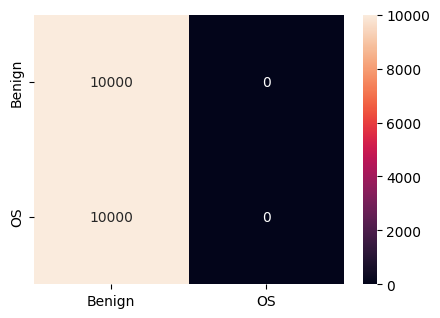





SCHD
['ts', 'Ether_type', 'IP_version', 'IP_ihl', 'TCP_dataofs', 'TCP_flags', 'TCP_ACK', 'TCP_options', 'sport_class', 'dport_class', 'pck_size_sum_of_EW', 'ts_mean_WE', 'ts_sum_of_EW', 'TCP_window_mean_WE', 'TCP_window_sum_of_EW', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'payload_bytes_sum_of_EW', 'entropy_std_WE', 'TCP_PSH_sum', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'sum', 'pck_size_mean_6', 'ts_mean_6', 'ts_std_6', 'pck_size_mean_9', 'ts_mean_9', 'ts_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SCHD          1    1     0  SVM    0.98    0.524    0.99  0.524  0.541  0.089  0.524   22.949     6.073
 1  SCHD          1    1     1  SVM    0.98    0.524    0.99  0.524  0.541  0.089  0.524   22.961     6.083
 2  SCHD          1    1     2  SVM    0.98    0.524    0.99  0.524  0.541  0.089  0.52

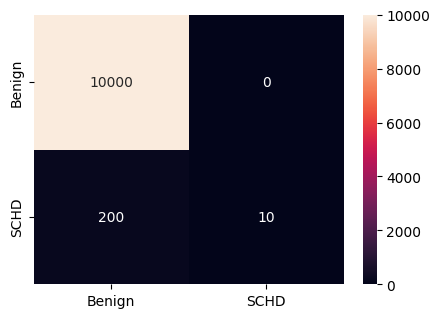





MHDis
['ts', 'IP_version', 'IP_flags', 'IP_proto', 'TCP_dataofs', 'TCP_options', 'sport_class', 'dport_class', 'Protocol', 'pck_size_mean_WE', 'pck_size_std_WE', 'ts_mean_WE', 'ts_sum_of_EW', 'TCP_window_sum_of_EW', 'ts_mean_2', 'ts_std_2', 'pck_size_mean_6', 'ts_mean_6', 'pck_size_mean_9', 'ts_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  MHDis         1    1     0  SVM   0.958    0.553   0.979  0.553  0.586  0.185  0.553   12.487     5.076
 1  MHDis         1    1     1  SVM   0.958    0.553   0.979  0.553  0.586  0.185  0.553   12.478     5.069
 2  MHDis         1    1     2  SVM   0.958    0.553   0.979  0.553  0.586  0.185  0.553   12.38      5.064
 3  MHDis         1    1     3  SVM   0.958    0.553   0.979  0.553  0.586  0.185  0.553   12.51      5.043
 4  MHDis         1    1     4  SV

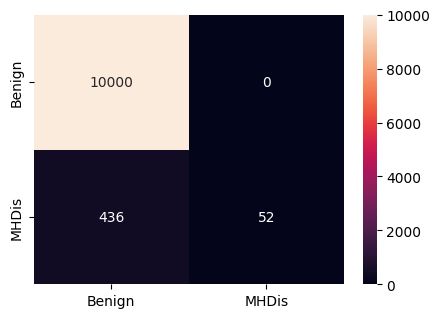

In [19]:
folder("results/test/")

for file in file_list:
    print(file)
    #if "UDP" in file:        feature=feature_list["UDP"]
    #else:        feature=feature_list[file]
    feature=feature_list[file]
    train=file_list[file][0]
    test=file_list[file][1]
    #feature,_=GA(train,test,features,gen_number=25,outputcsv=f"{file}_DT_chosed_GA_output.csv")
    print(feature)
    output_csv=f"./results/test/{file}_TEST_chosed_output_ML_.csv"
    target_names=["Benign",file]
    ML(train,test,output_csv,feature,file,1)  


In [20]:
files_add=find_the_way("./results/test/","_.csv")
files_add

results=[['Attack', 'ML','Acc', 'b_Acc', 'Prec', 'Rec',
       'F1', 'kap', 'ROC', 'tra-T', 'test-T']]


    
for i in tqdm(files_add):
    df=pd.read_csv(i)
    temp=df.values
    df=df.mean()
    df=list(df.values)
    temp=[temp[0][0],temp[0][4]]
    temp=temp+df[3:]
    results.append(temp)
results = pd.DataFrame (results[1:], columns = results[0])
results.to_csv("MEAN-resluts.csv",index=False)
print (tabulate(results, headers=list(results.columns)))

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 306.05it/s]

    Attack    ML         Acc     b_Acc      Prec       Rec        F1           kap       ROC      tra-T     test-T
--  --------  ----  --------  --------  --------  --------  --------  ------------  --------  ---------  ---------
 0  ACK       SVM   0.5       0.5       0.25      0.5       0.333333   0            0.5        43.7279   17.0165
 1  SYN       SVM   0.5       0.5       0.25      0.5       0.333333   0            0.5        41.7185   12.694
 2  OS        SVM   0.5       0.5       0.25      0.5       0.333333   0            0.5        20.8949   11.5201
 3  ARP       SVM   0.5       0.5       0.25      0.5       0.333333   0            0.5       123.882    30.3782
 4  BF        SVM   0.455497  0.5       0.227749  0.5       0.31295    0            0.5        19.0965    0.291165
 5  SP        SVM   0.543199  0.499792  0.271661  0.499792  0.351995  -0.000451142  0.499792    5.41913   3.94054
 6  MHDis     SVM   0.958429  0.553279  0.979111  0.553279  0.585629   0.185292     0.5532

In [21]:
df=pd.read_csv("MEAN-resluts.csv")
bos=pd.DataFrame()
for i in df["Attack"].unique():
    small=df[df["Attack"]==i]
    bos[i]=small["F1"].values
    print(i)
bos.to_csv("tablo.csv",index=False)

ACK
SYN
OS
ARP
BF
SP
MHDis
SCHD
UDP
HTTP
